In [1]:
# importing the module packages

from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

In [2]:
# handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# dealing with errors thrown by one of the plots
matplotlib_axes_logger.setLevel("ERROR")
import warnings
warnings.filterwarnings('ignore')

# adjusting fontsixe with seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [3]:
# reading the precipitation dataset
precip_data = pd.read_csv(
    "C:/Users/Juliance/Desktop/Earth_DS/Earth-Studies/precip-daily-2003-2013.csv",
    parse_dates=['DATE'],
    na_values=999.99,
    index_col='DATE'
)
precip_data.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [4]:
# subset time series data by time case year 2005 & remove missing values
data_2005 = precip_data['2005'].dropna()

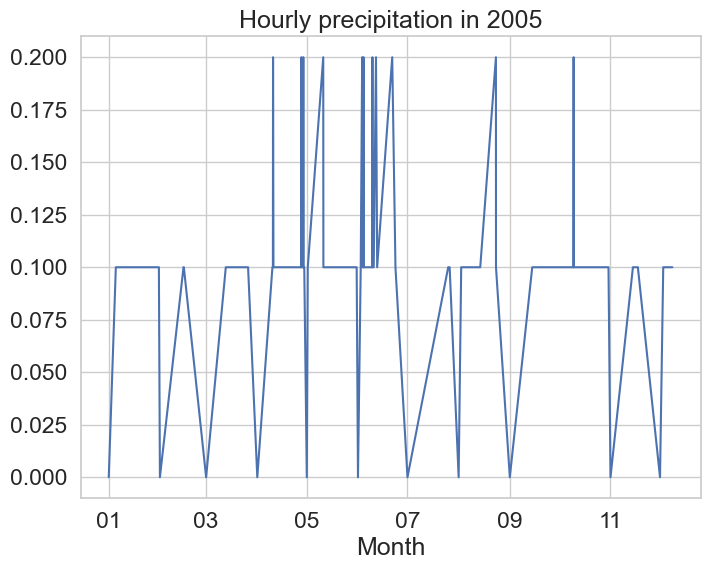

In [5]:
# hourly precipitation
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_2005.index.values, data_2005['HPCP'])
ax.xaxis.set_major_formatter(DateFormatter("%m"))
plt.title("Hourly precipitation in 2005")
plt.xlabel("Month")
plt.show()

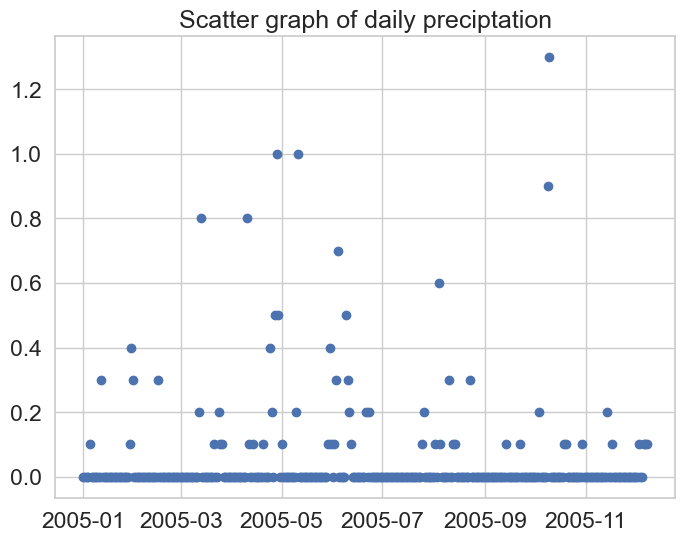

In [6]:
# draw plot of daily sums precipitation
data_D = data_2005.resample("D").sum()

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x=data_D.index.values,
        y=data_D['HPCP'])
plt.title("Scatter graph of daily preciptation")
plt.show()

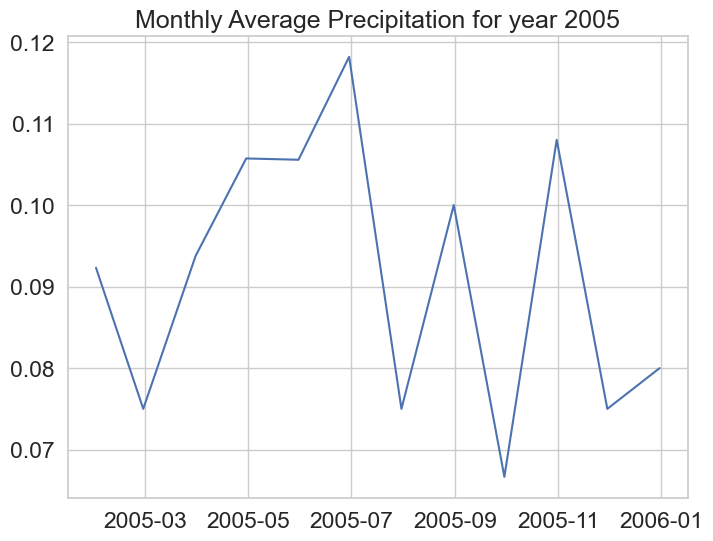

In [7]:
# draw plot of monthly average precipitation
data_m = data_2005.resample("M").mean()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_m.index.values, data_m['HPCP'])
ax.set_title("Monthly Average Precipitation for year 2005")
plt.show()
